In [1]:
import numpy as np
import pandas as pd

In [2]:
pwd()

'/Users/kevinjohn/Downloads'

In [4]:
#we dowload all the files required 
events = pd.read_json('/Users/kevinjohn/Downloads/events/events_World_Cup.json')

In [7]:
matches = pd.read_json('/Users/kevinjohn/Downloads/matches/matches_World_Cup.json')

In [9]:
players= pd.read_json('/Users/kevinjohn/Downloads/players.json')

In [21]:
teams = pd.read_json('/Users/kevinjohn/Downloads/teams.json')

players.head()

In [43]:
events.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],122671,"[{'y': 50, 'x': 50}, {'y': 53, 'x': 35}]",2057954,Pass,16521,1H,1.656214,85,258612104
1,8,High pass,[{'id': 1801}],139393,"[{'y': 53, 'x': 35}, {'y': 19, 'x': 75}]",2057954,Pass,16521,1H,4.487814,83,258612106
2,1,Air duel,"[{'id': 703}, {'id': 1801}]",103668,"[{'y': 81, 'x': 25}, {'y': 83, 'x': 37}]",2057954,Duel,14358,1H,5.937411,10,258612077
3,1,Air duel,"[{'id': 701}, {'id': 1802}]",122940,"[{'y': 19, 'x': 75}, {'y': 17, 'x': 63}]",2057954,Duel,16521,1H,6.406961,10,258612112
4,8,Simple pass,[{'id': 1801}],122847,"[{'y': 17, 'x': 63}, {'y': 15, 'x': 71}]",2057954,Pass,16521,1H,8.562167,85,258612110


In [22]:
players.head()

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,,Tekin,4502,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687
1,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,,Sarr,3775,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393228,left,M. Sarr,4423
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",72,Over,,Mandanda,3772,1998-10-26,176,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'France', 'id': '250', 'alpha3code': ...",393230,,O. Mandanda,null
3,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",82,Alfred John Momar,,N'Diaye,683,1990-03-06,187,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'France', 'id': '250', 'alpha3code': ...",32793,right,A. N'Diaye,19314
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",84,Ibrahima,,Konat\u00e9,2975,1999-05-25,192,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393247,right,I. Konat\u00e9,null


In [39]:
teams[teams['name']=='Spain']

,city,name,wyId,officialName,area,type
137,Las Rozas,Spain,1598,Spain,"{'name': 'Spain', 'id': 724, 'alpha3code': 'ES...",national


In [49]:
#here teamID of events data is same as wyId of match data --> therefore we merge on that 
#here events1 = data merged with team dataframe 

events1 = events.merge(teams[['name','wyId']],left_on='teamId',right_on='wyId')

In [58]:
events1.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,name,wyId
0,8,Simple pass,[{'id': 1801}],122671,"[{'y': 50, 'x': 50}, {'y': 53, 'x': 35}]",2057954,Pass,16521,1H,1.656214,85,258612104,Saudi Arabia,16521
1,8,High pass,[{'id': 1801}],139393,"[{'y': 53, 'x': 35}, {'y': 19, 'x': 75}]",2057954,Pass,16521,1H,4.487814,83,258612106,Saudi Arabia,16521
2,1,Air duel,"[{'id': 701}, {'id': 1802}]",122940,"[{'y': 19, 'x': 75}, {'y': 17, 'x': 63}]",2057954,Duel,16521,1H,6.406961,10,258612112,Saudi Arabia,16521
3,8,Simple pass,[{'id': 1801}],122847,"[{'y': 17, 'x': 63}, {'y': 15, 'x': 71}]",2057954,Pass,16521,1H,8.562167,85,258612110,Saudi Arabia,16521
4,8,Simple pass,[{'id': 1801}],122832,"[{'y': 15, 'x': 71}, {'y': 11, 'x': 92}]",2057954,Pass,16521,1H,10.991292,85,258612113,Saudi Arabia,16521


In [ ]:
#now to add player names to event1 
#we will use merge as playerid from events1 is same as wyid from players dataframe

In [110]:
events2 = events1.merge(players[['firstName','shortName','wyId']],left_on='playerId',right_on='wyId')

In [111]:
events2.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,name,wyId_x,firstName,shortName,wyId_y
0,8,Simple pass,[{'id': 1801}],122671,"[{'y': 50, 'x': 50}, {'y': 53, 'x': 35}]",2057954,Pass,16521,1H,1.656214,85,258612104,Saudi Arabia,16521,Mohammad Ibrahim,Mohammad Al Sahlawi,122671
1,1,Ground loose ball duel,"[{'id': 703}, {'id': 1801}]",122671,"[{'y': 24, 'x': 26}, {'y': 18, 'x': 26}]",2057954,Duel,16521,1H,104.787013,13,258612144,Saudi Arabia,16521,Mohammad Ibrahim,Mohammad Al Sahlawi,122671
2,7,Touch,[{'id': 1302}],122671,"[{'y': 76, 'x': 68}, {'y': 70, 'x': 71}]",2057954,Others on the ball,16521,1H,257.819301,72,258612194,Saudi Arabia,16521,Mohammad Ibrahim,Mohammad Al Sahlawi,122671
3,8,Simple pass,[{'id': 1801}],122671,"[{'y': 61, 'x': 69}, {'y': 46, 'x': 68}]",2057954,Pass,16521,1H,286.047782,85,258612213,Saudi Arabia,16521,Mohammad Ibrahim,Mohammad Al Sahlawi,122671
4,1,Air duel,"[{'id': 701}, {'id': 1802}]",122671,"[{'y': 72, 'x': 76}, {'y': 92, 'x': 61}]",2057954,Duel,16521,1H,603.934186,10,258612387,Saudi Arabia,16521,Mohammad Ibrahim,Mohammad Al Sahlawi,122671


In [112]:
events2.drop(['wyId_x','wyId_y'],axis=1,inplace=True)

In [113]:
events2.rename(columns={'shortName':'player_name','name':'team_name'},inplace=True)

In [116]:
events2 = events2.merge(matches[['label','wyId']],left_on='matchId',right_on='wyId')

In [120]:
events2.drop(columns='wyId',axis=1,inplace=True)

In [130]:
events2['label'][0][]

'Russia - Saudi Arabia, 5 - 0'

In [136]:
events2.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,team_name,firstName,player_name,label
0,8,Simple pass,[{'id': 1801}],122671,"[{'y': 50, 'x': 50}, {'y': 53, 'x': 35}]",2057954,Pass,16521,1H,1.656214,85,258612104,Saudi Arabia,Mohammad Ibrahim,Mohammad Al Sahlawi,"Russia - Saudi Arabia, 5 - 0"
1,1,Ground loose ball duel,"[{'id': 703}, {'id': 1801}]",122671,"[{'y': 24, 'x': 26}, {'y': 18, 'x': 26}]",2057954,Duel,16521,1H,104.787013,13,258612144,Saudi Arabia,Mohammad Ibrahim,Mohammad Al Sahlawi,"Russia - Saudi Arabia, 5 - 0"
2,7,Touch,[{'id': 1302}],122671,"[{'y': 76, 'x': 68}, {'y': 70, 'x': 71}]",2057954,Others on the ball,16521,1H,257.819301,72,258612194,Saudi Arabia,Mohammad Ibrahim,Mohammad Al Sahlawi,"Russia - Saudi Arabia, 5 - 0"
3,8,Simple pass,[{'id': 1801}],122671,"[{'y': 61, 'x': 69}, {'y': 46, 'x': 68}]",2057954,Pass,16521,1H,286.047782,85,258612213,Saudi Arabia,Mohammad Ibrahim,Mohammad Al Sahlawi,"Russia - Saudi Arabia, 5 - 0"
4,1,Air duel,"[{'id': 701}, {'id': 1802}]",122671,"[{'y': 72, 'x': 76}, {'y': 92, 'x': 61}]",2057954,Duel,16521,1H,603.934186,10,258612387,Saudi Arabia,Mohammad Ibrahim,Mohammad Al Sahlawi,"Russia - Saudi Arabia, 5 - 0"


In [146]:
matches[matches['label']=='France - Croatia, 4 - 2']

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,groupName,referees,duration,competitionId
0,Played,4165368,0,"{'9598': {'scoreET': 0, 'coachId': 122788, 'si...",10078,2018-07-15 15:00:00,4418,Olimpiyskiy stadion Luzhniki,2058017,"France - Croatia, 4 - 2",2018-07-15 17:00:00-02:00,,"[{'refereeId': 378051, 'role': 'referee'}, {'r...",Regular,28


In [148]:
#now we extract only the data required which is the final game 
final_game= events2[events2['label']=='France - Croatia, 4 - 2']

In [150]:
final_game[final_game['eventName']=='Pass']

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,team_name,firstName,player_name,label
35698,8,Simple pass,[{'id': 1801}],340646,"[{'y': 86, 'x': 48}, {'y': 67, 'x': 34}]",2058017,Pass,4418,1H,359.540281,85,263884072,France,Benjamin,B. Pavard,"France - Croatia, 4 - 2"
35700,8,Simple pass,[{'id': 1801}],340646,"[{'y': 81, 'x': 59}, {'y': 70, 'x': 38}]",2058017,Pass,4418,1H,718.934175,85,263884191,France,Benjamin,B. Pavard,"France - Croatia, 4 - 2"
35701,8,Simple pass,[{'id': 1801}],340646,"[{'y': 81, 'x': 42}, {'y': 38, 'x': 12}]",2058017,Pass,4418,1H,725.211674,85,263884193,France,Benjamin,B. Pavard,"France - Croatia, 4 - 2"
35707,8,Launch,[{'id': 1802}],340646,"[{'y': 92, 'x': 59}, {'y': 63, 'x': 74}]",2058017,Pass,4418,1H,1501.306752,84,263884339,France,Benjamin,B. Pavard,"France - Croatia, 4 - 2"
35708,8,Simple pass,[{'id': 1801}],340646,"[{'y': 81, 'x': 39}, {'y': 94, 'x': 58}]",2058017,Pass,4418,1H,1598.669778,85,263884381,France,Benjamin,B. Pavard,"France - Croatia, 4 - 2"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37141,8,Simple pass,[{'id': 1802}],69968,"[{'y': 45, 'x': 52}, {'y': 41, 'x': 59}]",2058017,Pass,9598,2H,2660.962372,85,263885600,Croatia,Marcelo,M. Brozovi\u0107,"France - Croatia, 4 - 2"
37144,8,Simple pass,[{'id': 1801}],69968,"[{'y': 86, 'x': 29}, {'y': 45, 'x': 29}]",2058017,Pass,9598,2H,2754.460655,85,263885612,Croatia,Marcelo,M. Brozovi\u0107,"France - Croatia, 4 - 2"
37148,8,Simple pass,[{'id': 1801}],69968,"[{'y': 16, 'x': 62}, {'y': 11, 'x': 74}]",2058017,Pass,9598,2H,2886.429661,85,263885639,Croatia,Marcelo,M. Brozovi\u0107,"France - Croatia, 4 - 2"
37153,8,Simple pass,[{'id': 1802}],135810,"[{'y': 81, 'x': 77}, {'y': 76, 'x': 100}]",2058017,Pass,9598,2H,2400.002448,85,263885491,Croatia,Marko,M. Pjaca,"France - Croatia, 4 - 2"


In [153]:

player_pass_final= final_game[final_game['eventName']=='Pass'][['firstName','team_name','teamId','eventName']]


In [178]:
player_pass_final

,firstName,team_name,teamId,eventName
35698,Benjamin,France,4418,Pass
35700,Benjamin,France,4418,Pass
35701,Benjamin,France,4418,Pass
35707,Benjamin,France,4418,Pass
35708,Benjamin,France,4418,Pass
...,...,...,...,...
37141,Marcelo,Croatia,9598,Pass
37144,Marcelo,Croatia,9598,Pass
37148,Marcelo,Croatia,9598,Pass
37153,Marko,Croatia,9598,Pass


In [ ]:
#total passes completed by benjamin 

In [158]:
player_pass_final[player_pass_final['firstName']=='Benjamin']['eventName'].count()

20

In [161]:
player_pass_final['team_name']

35698     France
35700     France
35701     France
35707     France
35708     France
          ...   
37141    Croatia
37144    Croatia
37148    Croatia
37153    Croatia
37154    Croatia
Name: team_name, Length: 759, dtype: object

In [189]:
player_pass_final['teamId']

35698    4418
35700    4418
35701    4418
35707    4418
35708    4418
         ... 
37141    9598
37144    9598
37148    9598
37153    9598
37154    9598
Name: teamId, Length: 759, dtype: int64

In [192]:
player_final = player_pass_final.groupby(['firstName','team_name','teamId']).count()

In [195]:
player_final.reset_index(inplace=True)

In [238]:
player_final.drop(index=[21,24],inplace=True)


In [213]:
import seaborn as sns 
from matplotlib import pyplot as plt
%matplotlib inline

Text(0, 0.5, 'TOTAL PASS COMPLETED')

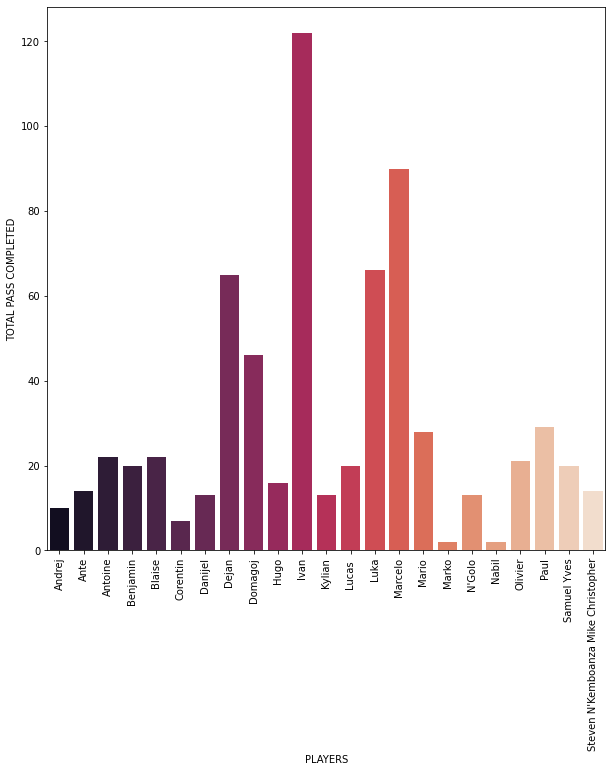

In [239]:
plt.figure(figsize=(10,10))
sns.barplot(x='firstName',y='eventName',data=player_final,palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('PLAYERS')
plt.ylabel('TOTAL PASS COMPLETED')


In [253]:
all_game = events2[events2['eventName']=='Pass'][['firstName','player_name','team_name','teamId','eventName']]

In [254]:
all_game = all_game.groupby(['firstName','player_name','team_name','teamId']).count()


In [256]:
all_game.reset_index(inplace=True)

In [266]:
#identify all the players that had the greatest number of passes 
top_ten_passers= all_game.sort_values(by=['eventName'],ascending=False)[:10]

In [267]:

top_ten_passers



,firstName,player_name,team_name,teamId,eventName
505,Sergio,Sergio Ramos,Spain,1598,482
266,John,J. Stones,England,2413,470
332,Luka,L. Modri\u0107,Croatia,9598,461
175,Francisco Rom\u00e1n,Isco,Spain,1598,447
538,Toby,T. Alderweireld,Belgium,5629,442
233,Ivan,I. Rakiti\u0107,Croatia,9598,404
210,Harry,H. Maguire,England,2413,398
275,Jordi,Jordi Alba,Spain,1598,376
313,Kyle,K. Walker,England,2413,370
410,N'Golo,N. Kant\u00e9,France,4418,360


In [297]:
top_ten_passers['player_name'][[332,233,410]]

332     L. Modri\u0107
233    I. Rakiti\u0107
410      N. Kant\u00e9
Name: player_name, dtype: object

In [298]:
top_ten_passers.replace(['L. Modri\u0107','I. Rakiti\u0107', 'N. Kant\u00e9'],['L.Modric','I.Rakitic','N.kante'],inplace=True)



In [317]:

#here we chnage the name which have error values
top_ten_passers.replace([top_ten_passers['player_name'][332],top_ten_passers['player_name'][233],top_ten_passers['player_name'][410]]
                        ,['L.Modric','I.Raktic','N. Kante'],inplace=True)
    




In [318]:
#finished Product
top_ten_passers

,firstName,player_name,team_name,teamId,eventName
505,Sergio,Sergio Ramos,Spain,1598,482
266,John,J. Stones,England,2413,470
332,Luka,L.Modric,Croatia,9598,461
175,Francisco Rom\u00e1n,Isco,Spain,1598,447
538,Toby,T. Alderweireld,Belgium,5629,442
233,Ivan,I.Raktic,Croatia,9598,404
210,Harry,H. Maguire,England,2413,398
275,Jordi,Jordi Alba,Spain,1598,376
313,Kyle,K. Walker,England,2413,370
410,N'Golo,N. Kante,France,4418,360


Text(0, 0.5, 'TOTAL PASS COMPLETED')

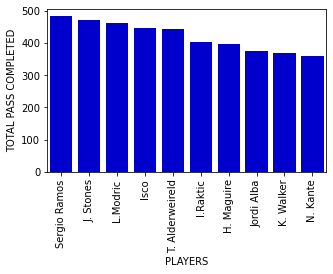

In [354]:
plt.figure(figsize=(5,3))
sns.barplot(x='player_name',y='eventName',data=top_ten_passers,color='mediumblue',saturation=30)
plt.xticks(rotation=90)
plt.xlabel('PLAYERS')
plt.ylabel('TOTAL PASS COMPLETED')